Libs

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Extração e transformação dos dados

In [ ]:
file_path = '/content/survey_results_public.csv'
df = pd.read_csv(file_path)
df = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')

In [ ]:
# Mapeamento das faixas etárias para valores numéricos
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Substituir as faixas etárias pelos valores numéricos
df['Age'] = df['Age'].map(age_mapping)


# Calcular a média de idade para cada tipo de desenvolvedor
mean_age = df.groupby('DevType')['Age'].mean().reset_index()

# Ordenar o DataFrame pela média de idade em ordem decrescente
mean_age_sorted = mean_age.sort_values('Age', ascending=False)

<ipython-input-5-aff72f21b081>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='DevType', data=mean_age_sorted, palette='viridis')


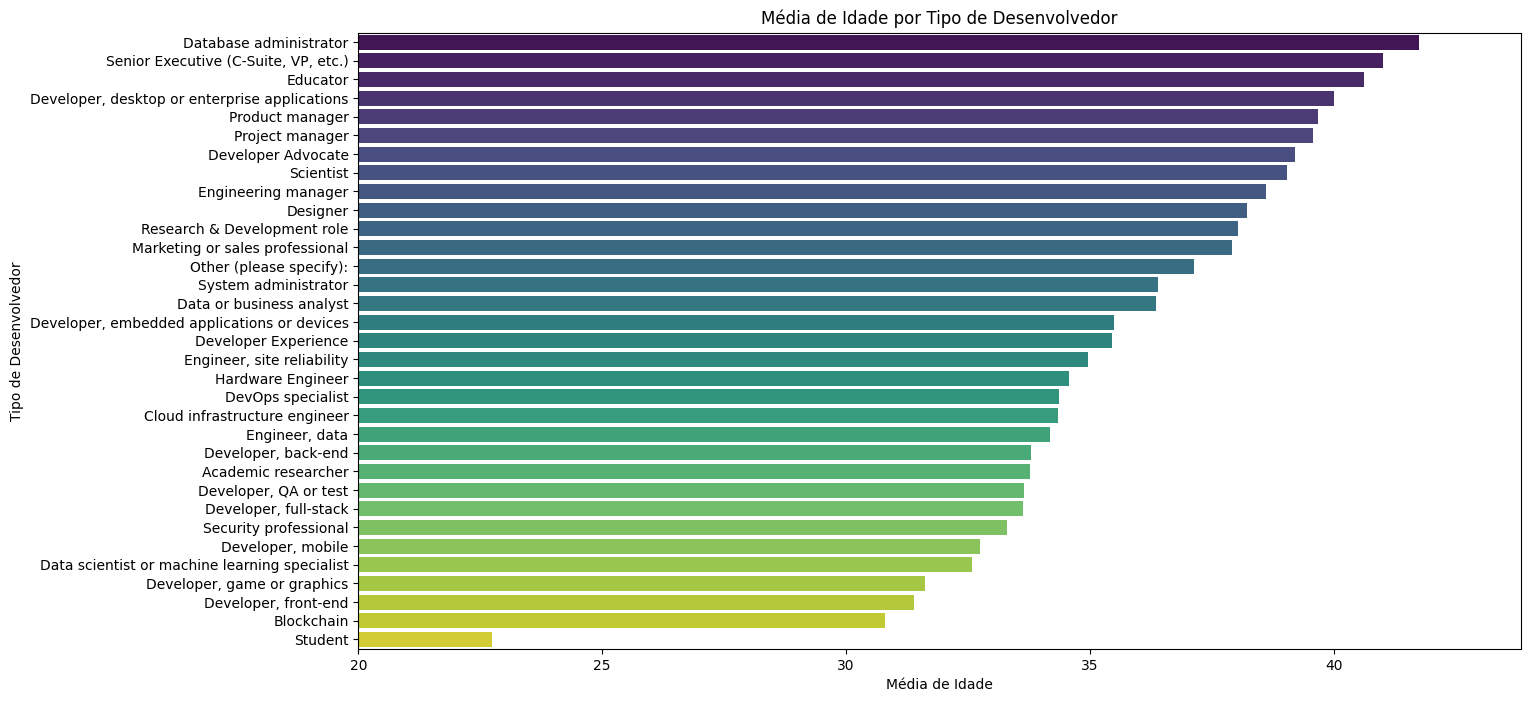

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Age', y='DevType', data=mean_age_sorted, palette='viridis')

plt.title('Média de Idade por Tipo de Desenvolvedor')
plt.xlabel('Média de Idade')
plt.ylabel('Tipo de Desenvolvedor')

plt.xlim(20)
plt.show()

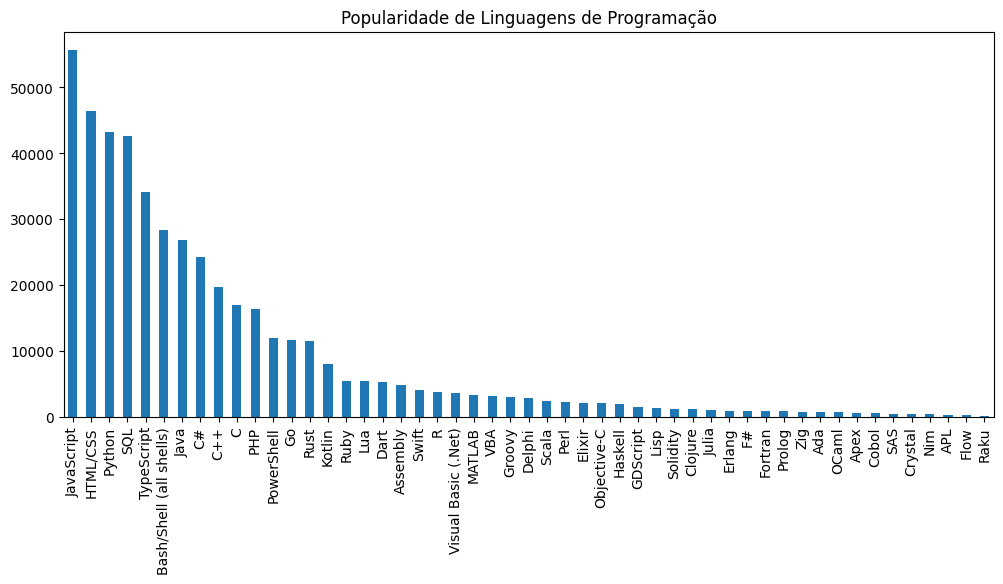

In [ ]:
# Gráfico 3: Popularidade de Linguagens de Programação
df_languages = df['LanguageHaveWorkedWith'].str.get_dummies(sep=';').sum().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
df_languages.plot(kind='bar')
plt.title('Popularidade de Linguagens de Programação')
plt.show()

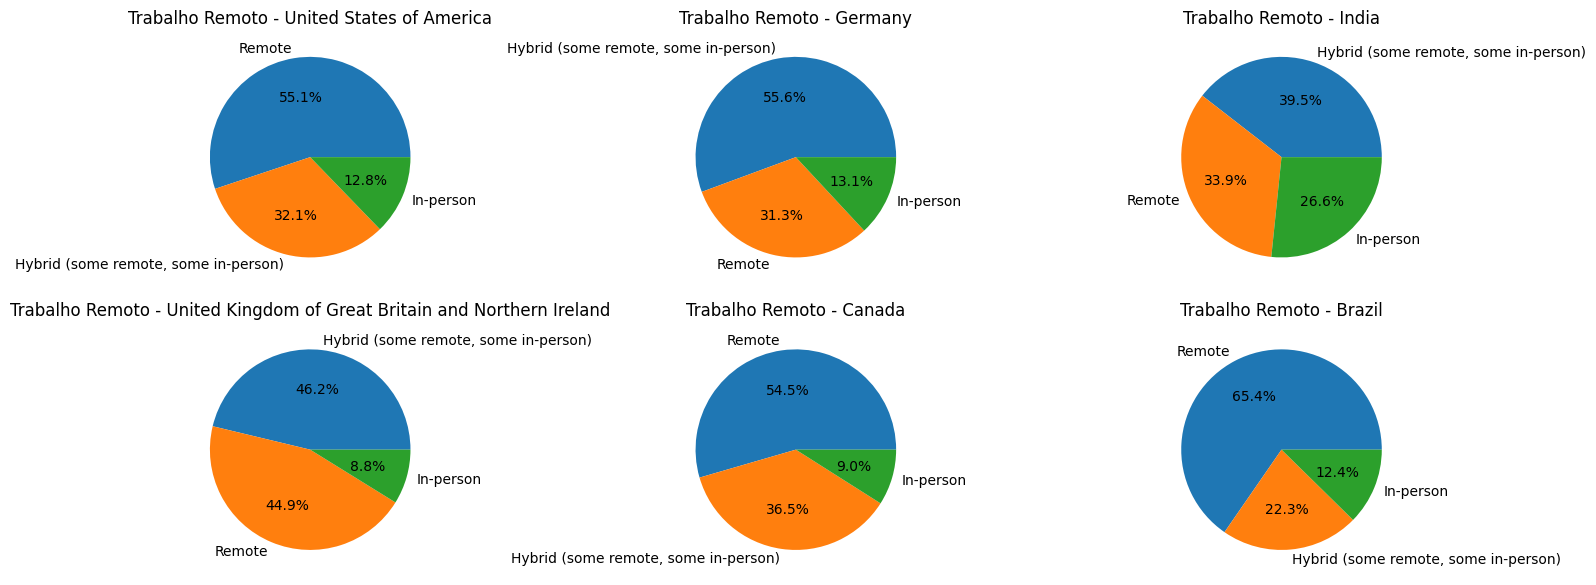

In [ ]:
# Contar o número de respostas por país
top_countries = df['Country'].value_counts().head(5).index

# Adicionar Brasil à lista
top_countries = top_countries.tolist() + ['Brazil']

# Filtrar o dataframe para os países selecionados
df_top_countries = df[df['Country'].isin(top_countries)]

# Plotar gráficos de pizza para as preferências de trabalho remoto por país
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

for i, country in enumerate(top_countries):
    row = i // 3  # Calcula a linha do gráfico
    col = i % 3   # Calcula a coluna do gráfico
    country_data = df_top_countries[df_top_countries['Country'] == country]['RemoteWork'].value_counts()
    axes[row, col].pie(country_data, labels=country_data.index, autopct='%1.1f%%')
    axes[row, col].set_title(f'Trabalho Remoto - {country}')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

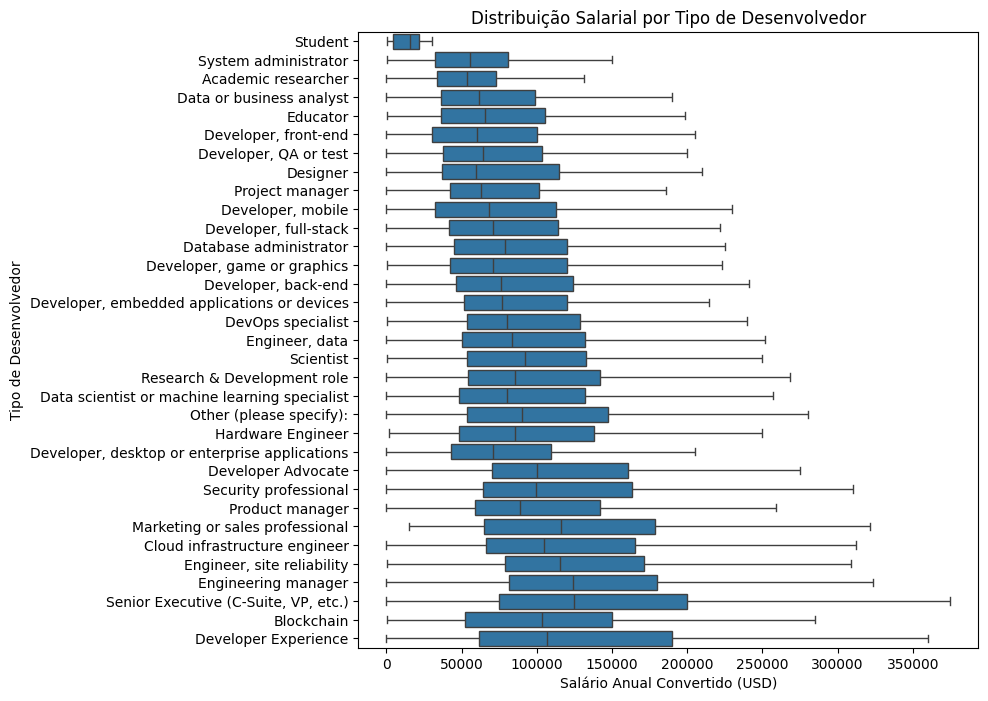

In [ ]:
# Calcula a média salarial para cada tipo de desenvolvedor e ordena em ordem decrescente
ordered_devtypes = df.groupby('DevType')['ConvertedCompYearly'].mean().sort_values(ascending=True).index

# Plotar o boxplot com todos os tipos de desenvolvedores, sem outliers e em ordem decrescente de salário médio
plt.figure(figsize=(8, 8))
sns.boxplot(y='DevType', x='ConvertedCompYearly', data=df, showfliers=False, order=ordered_devtypes)
plt.xscale('linear')
plt.title('Distribuição Salarial por Tipo de Desenvolvedor')
plt.xlabel('Salário Anual Convertido (USD)')
plt.ylabel('Tipo de Desenvolvedor')
plt.show()

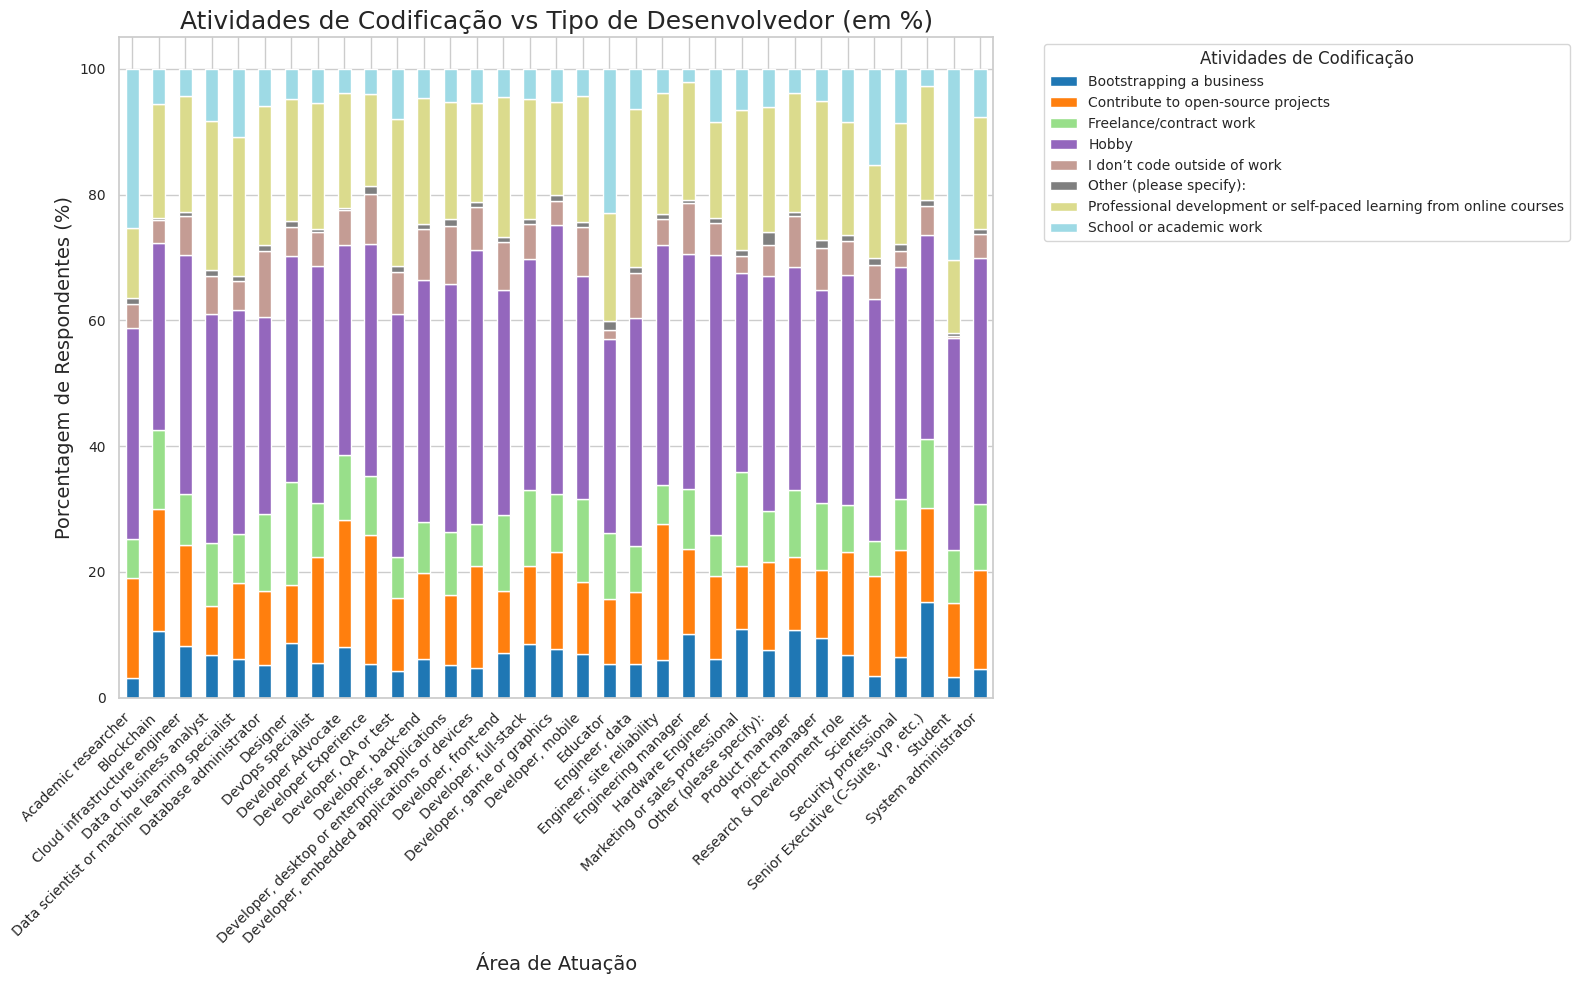

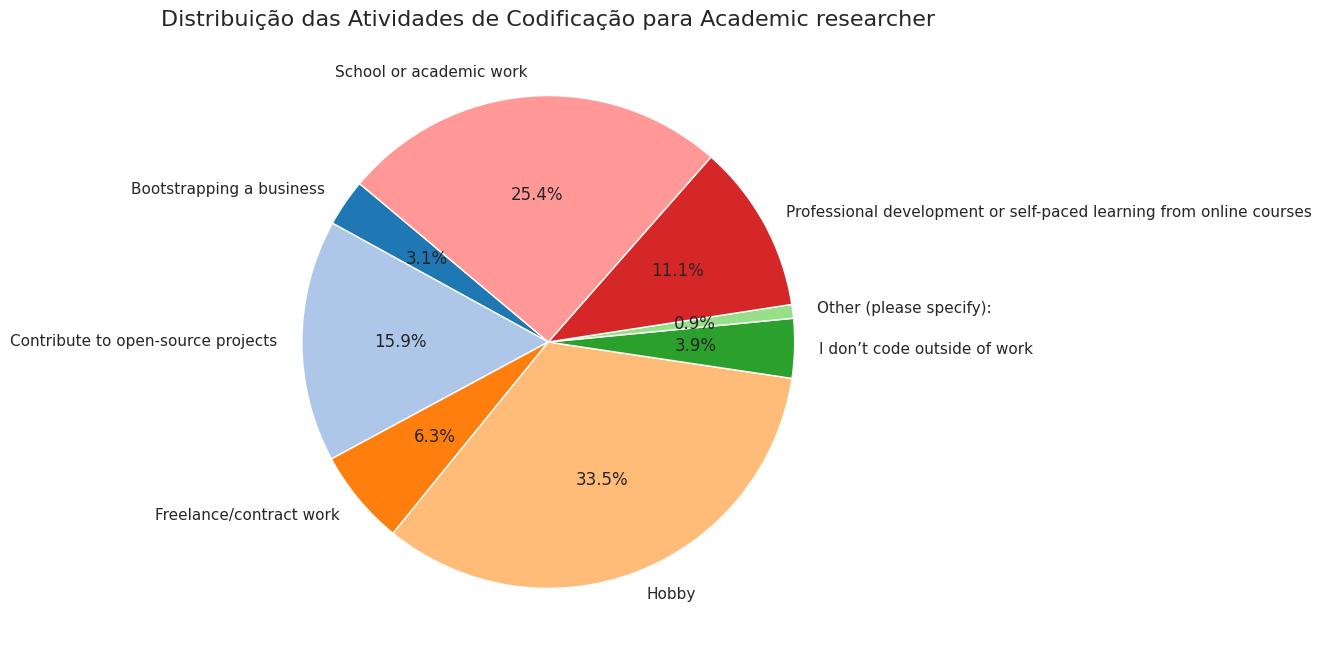

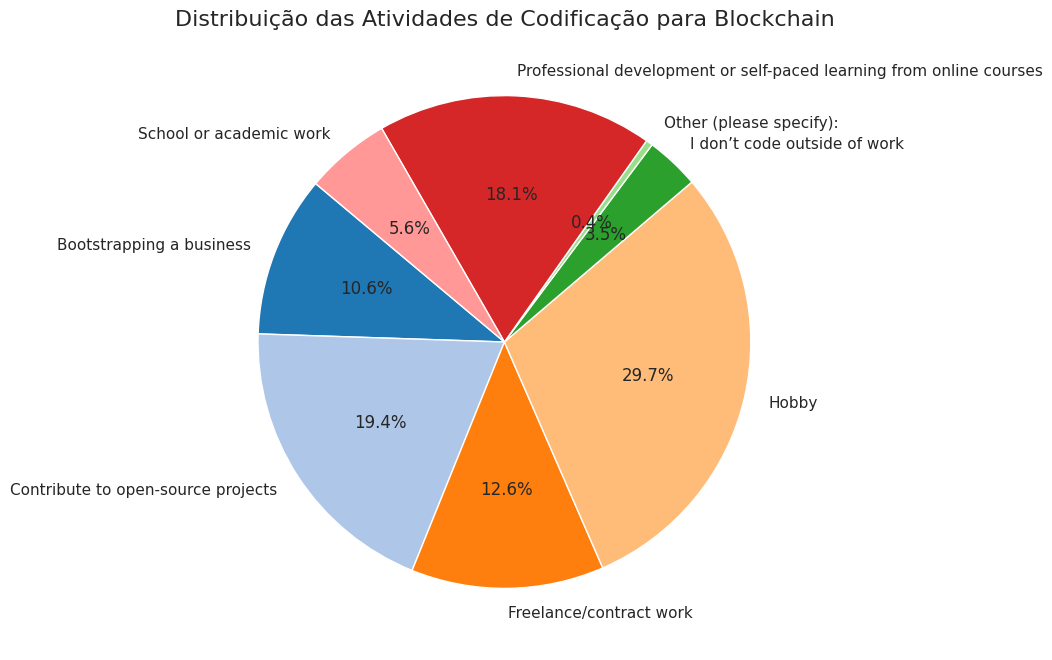

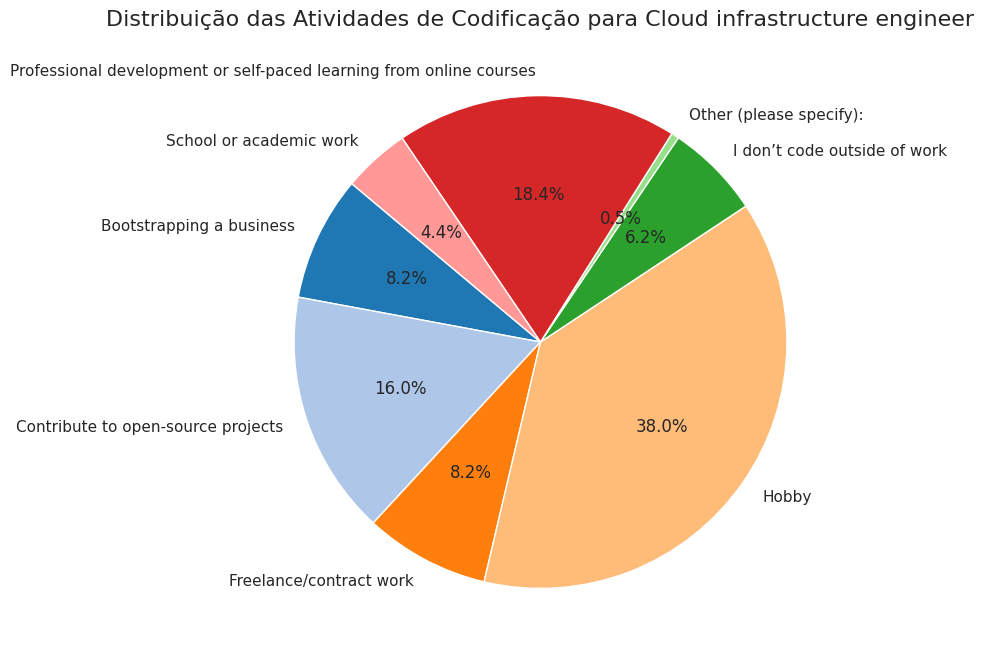

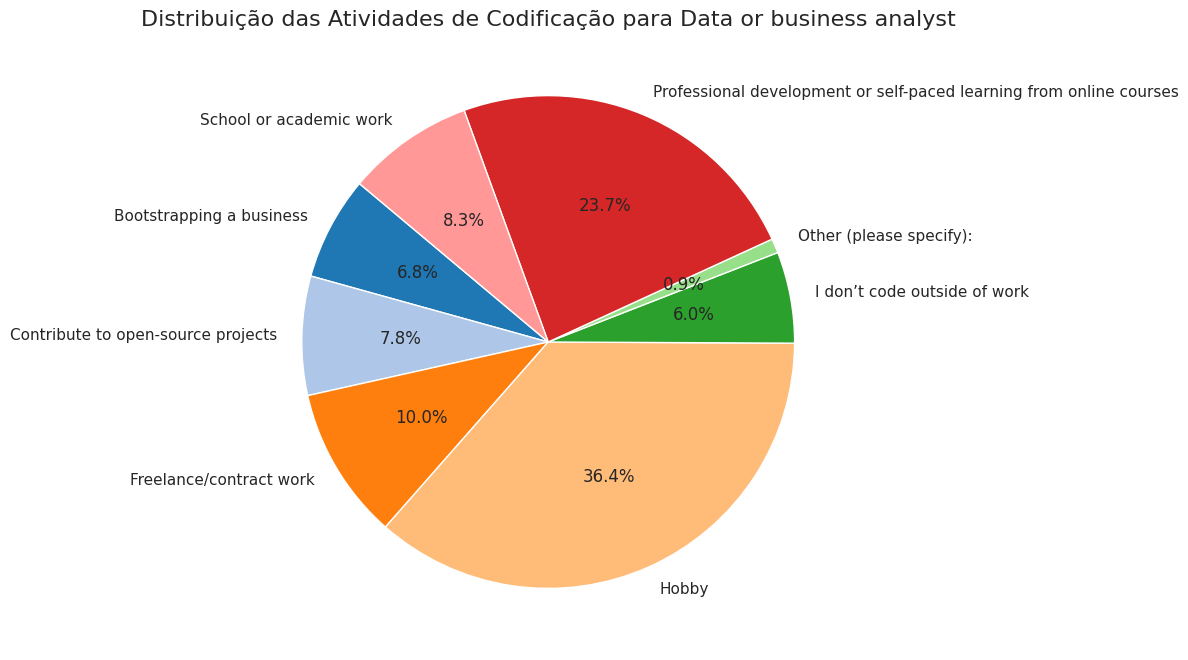

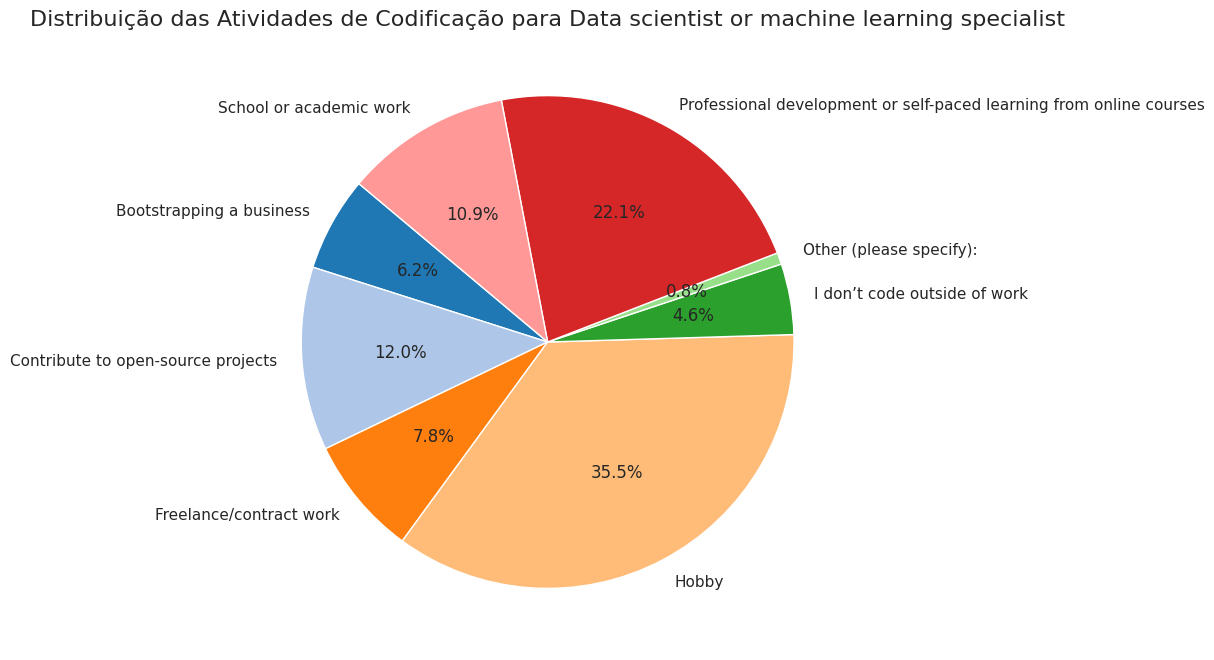

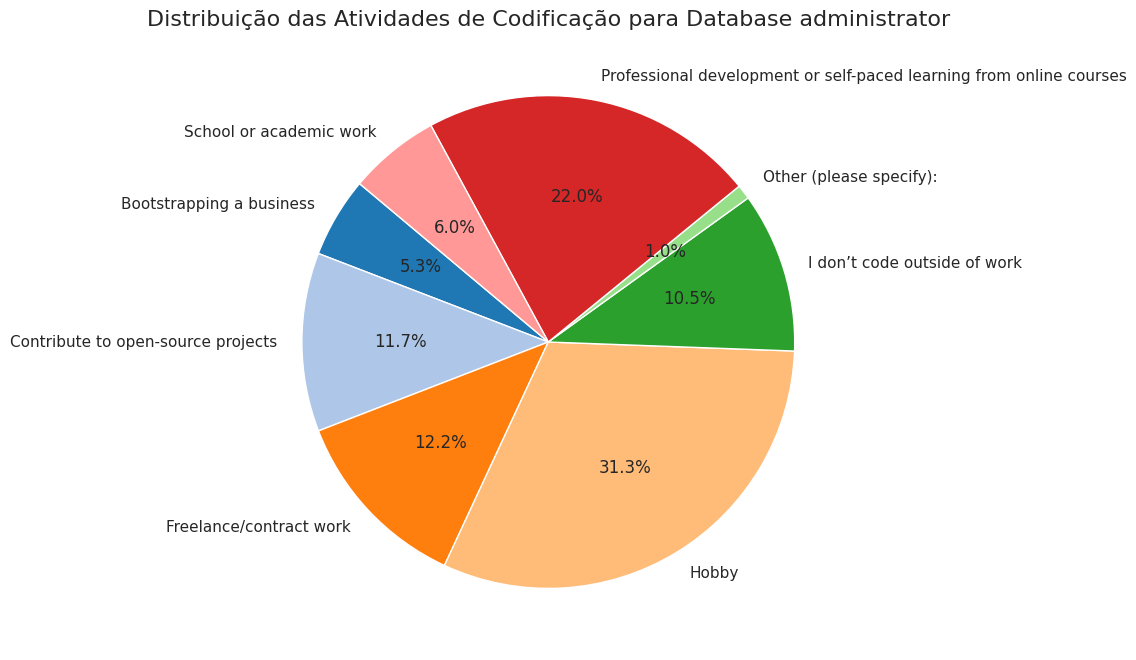

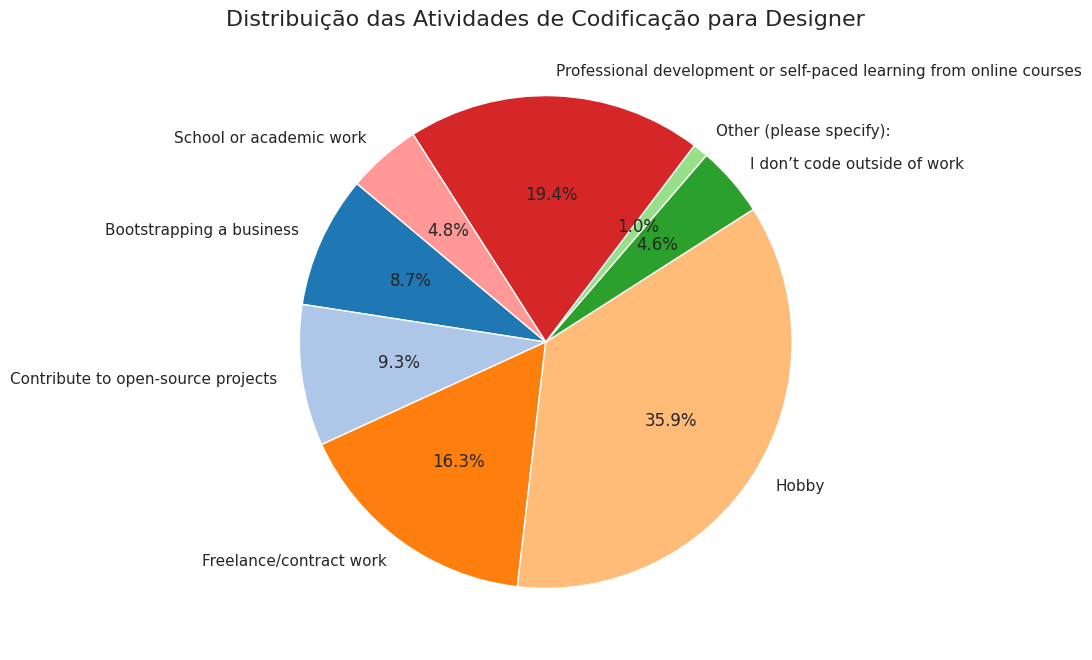

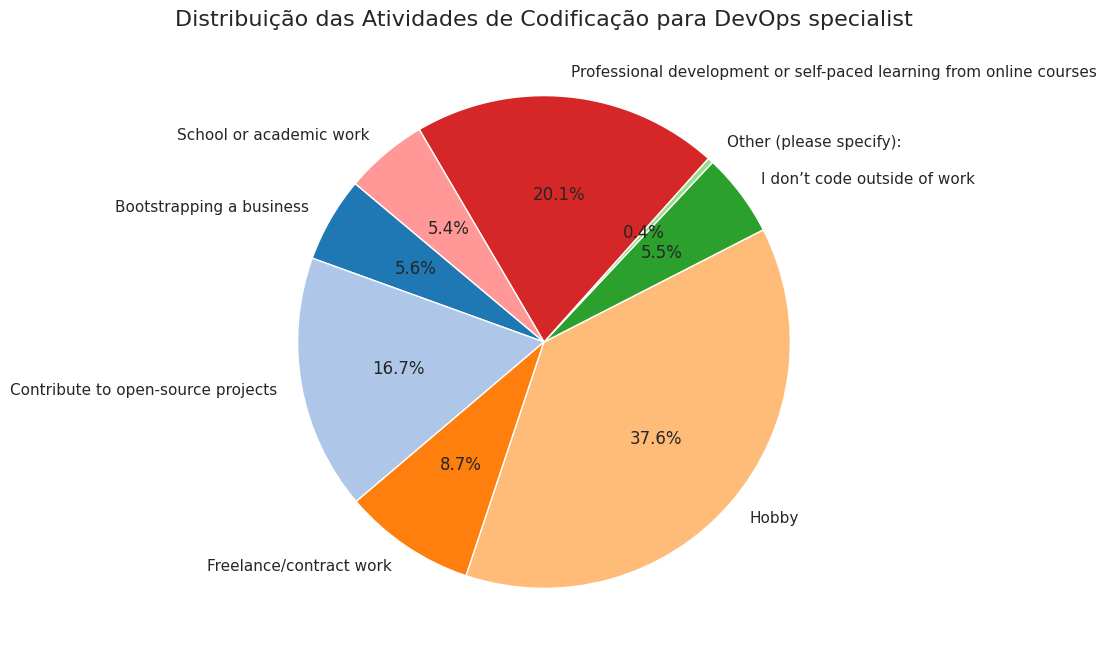

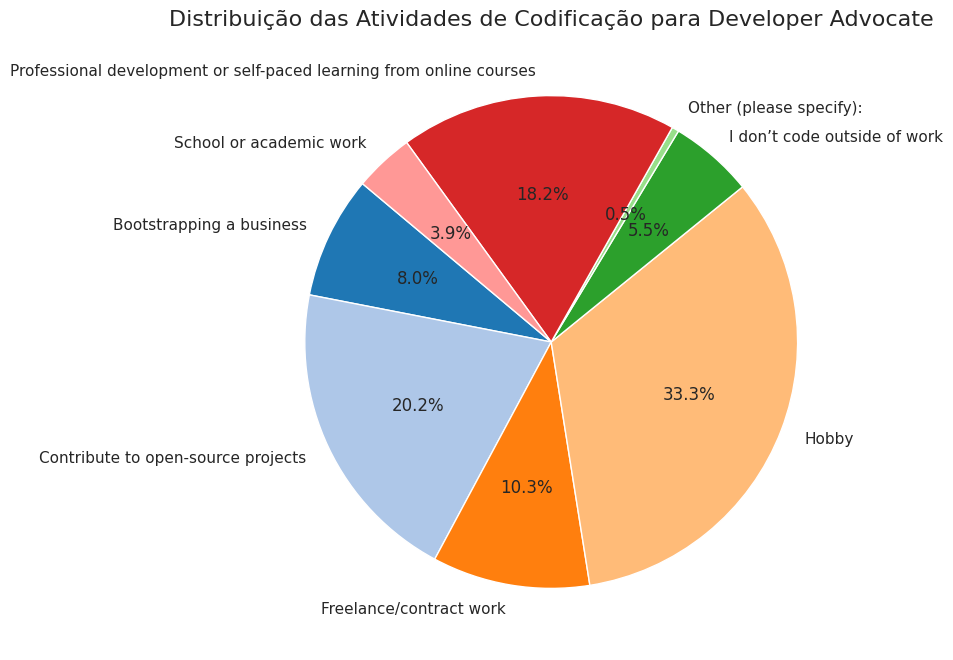

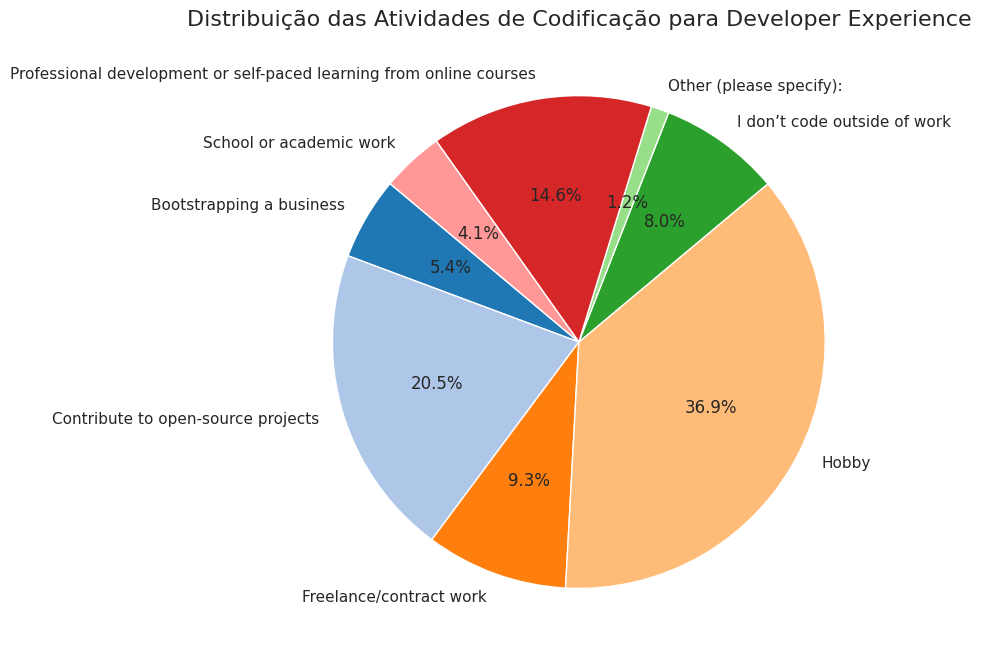

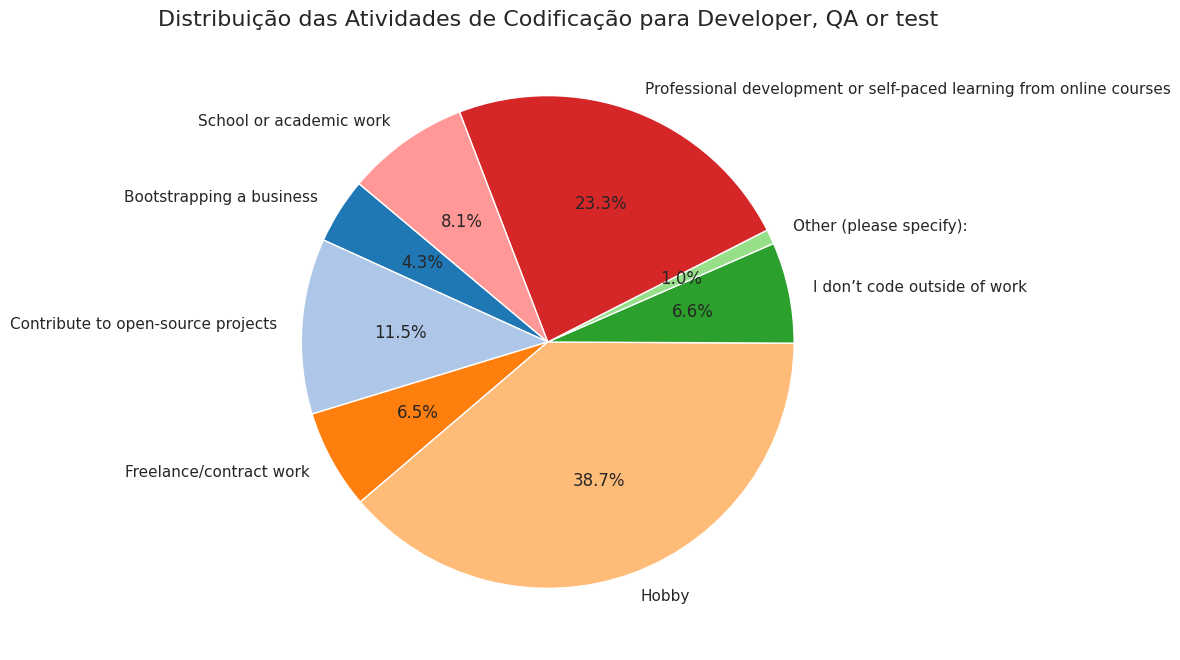

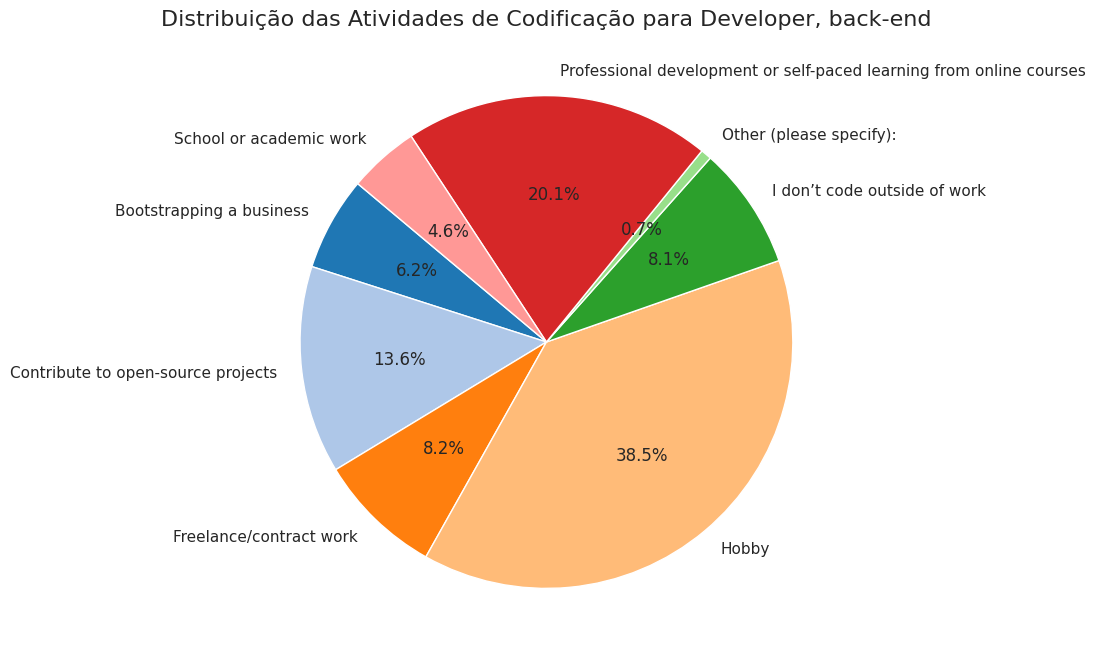

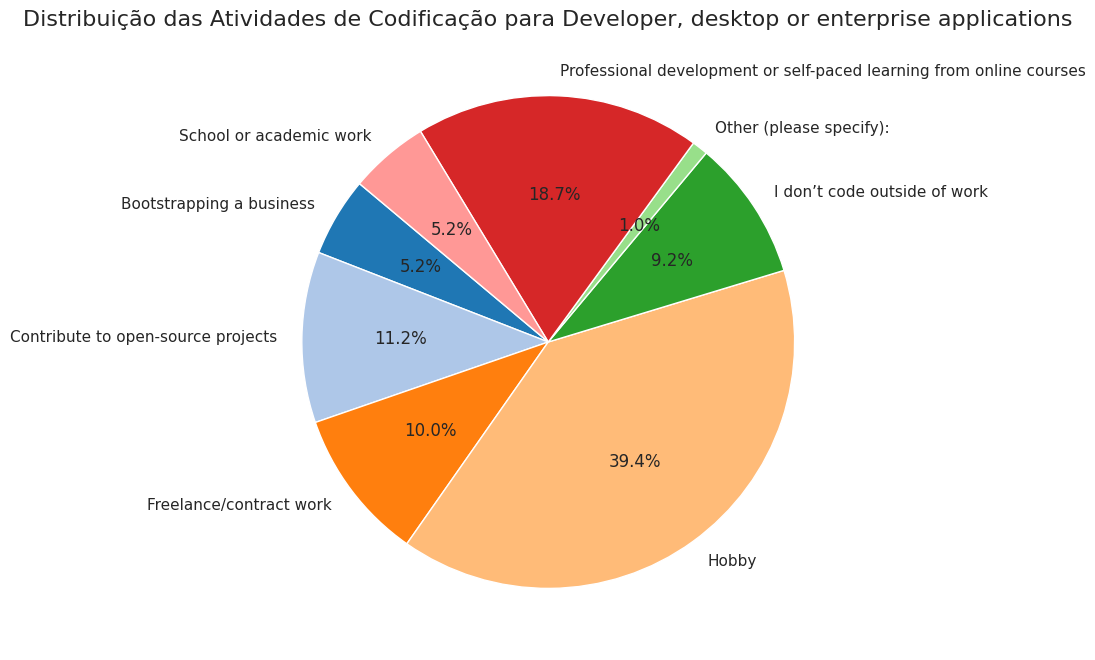

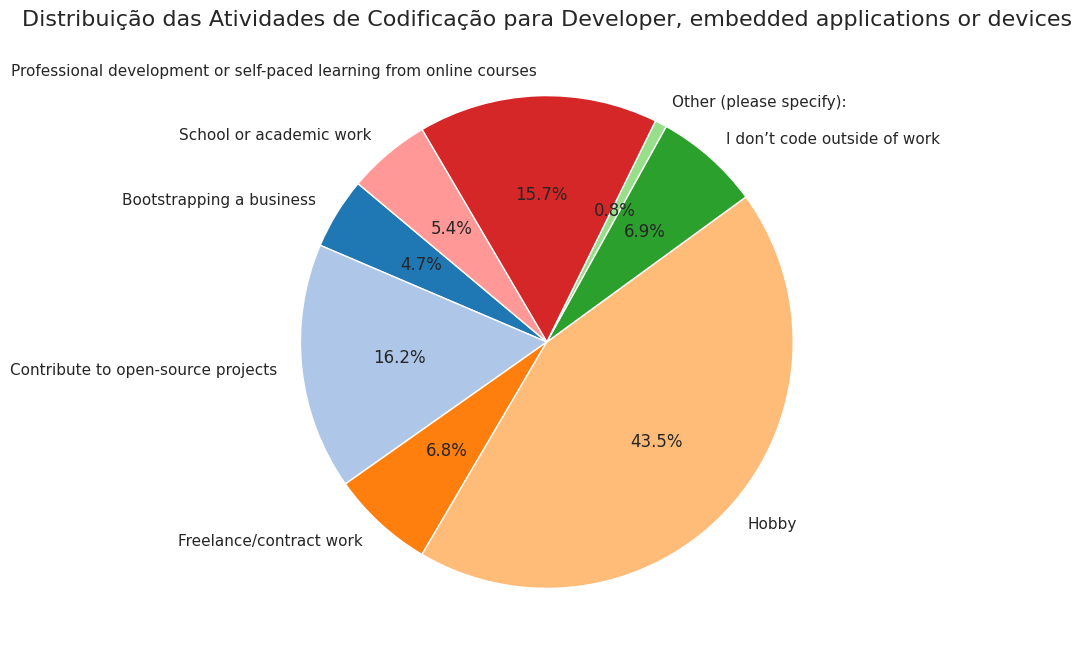

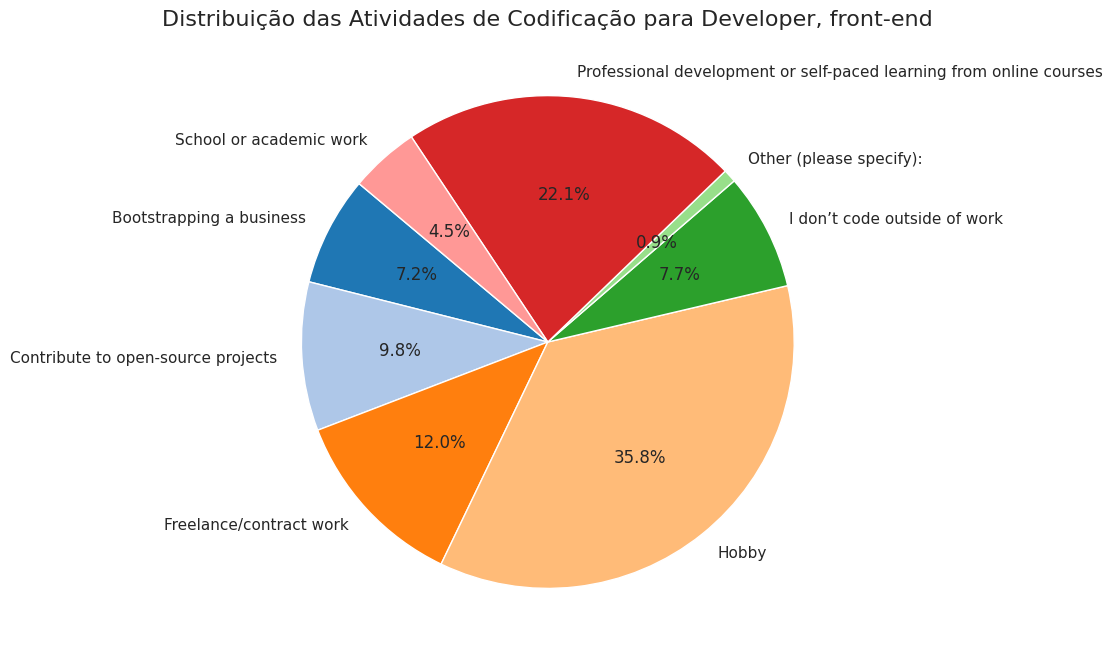

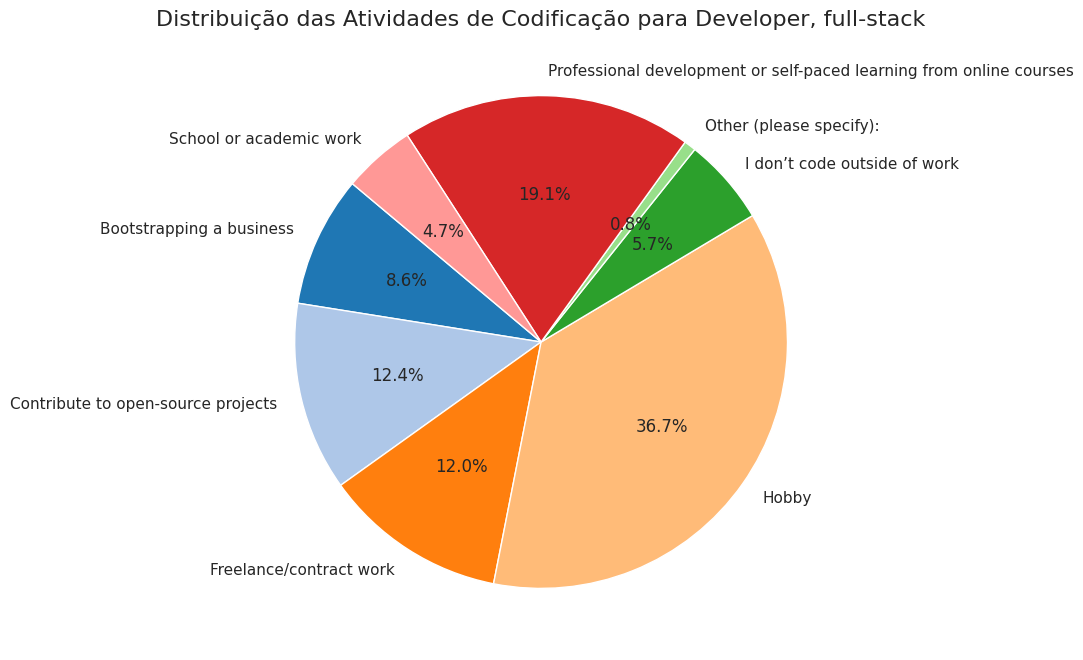

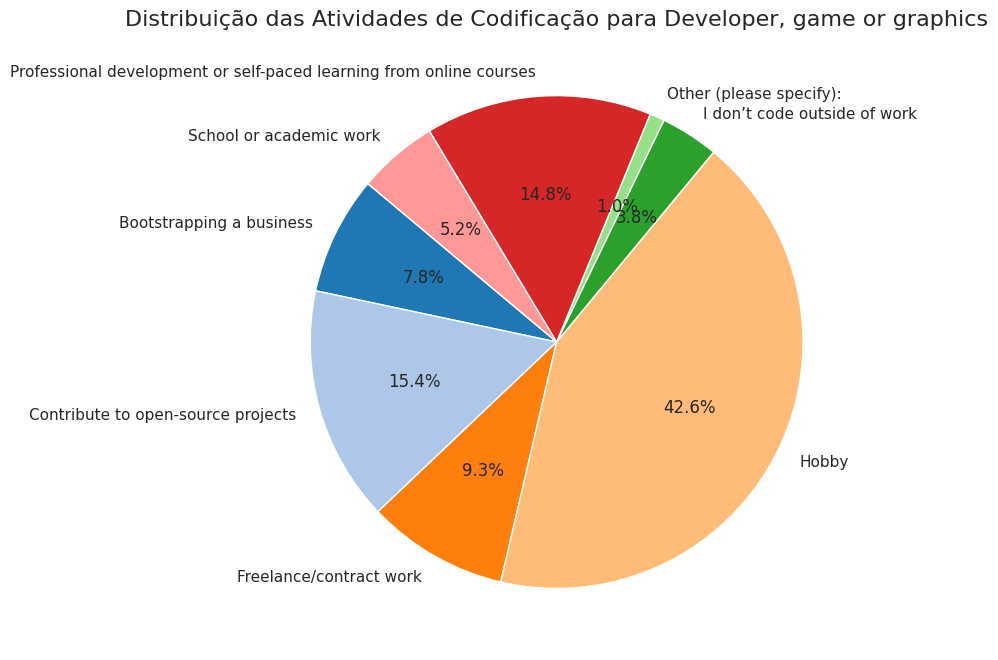

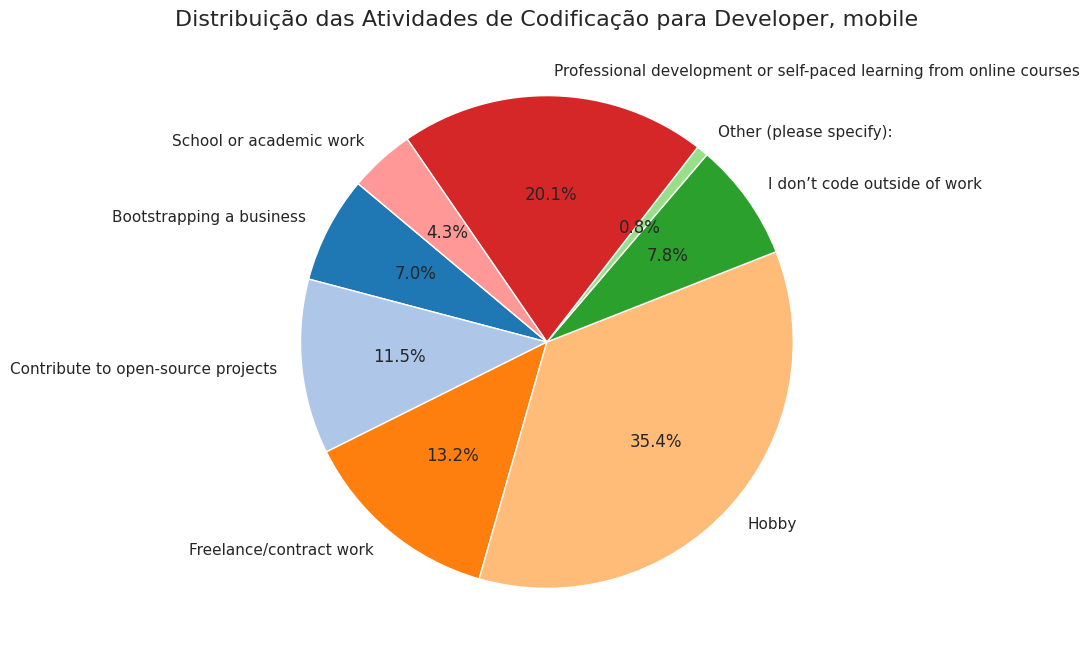

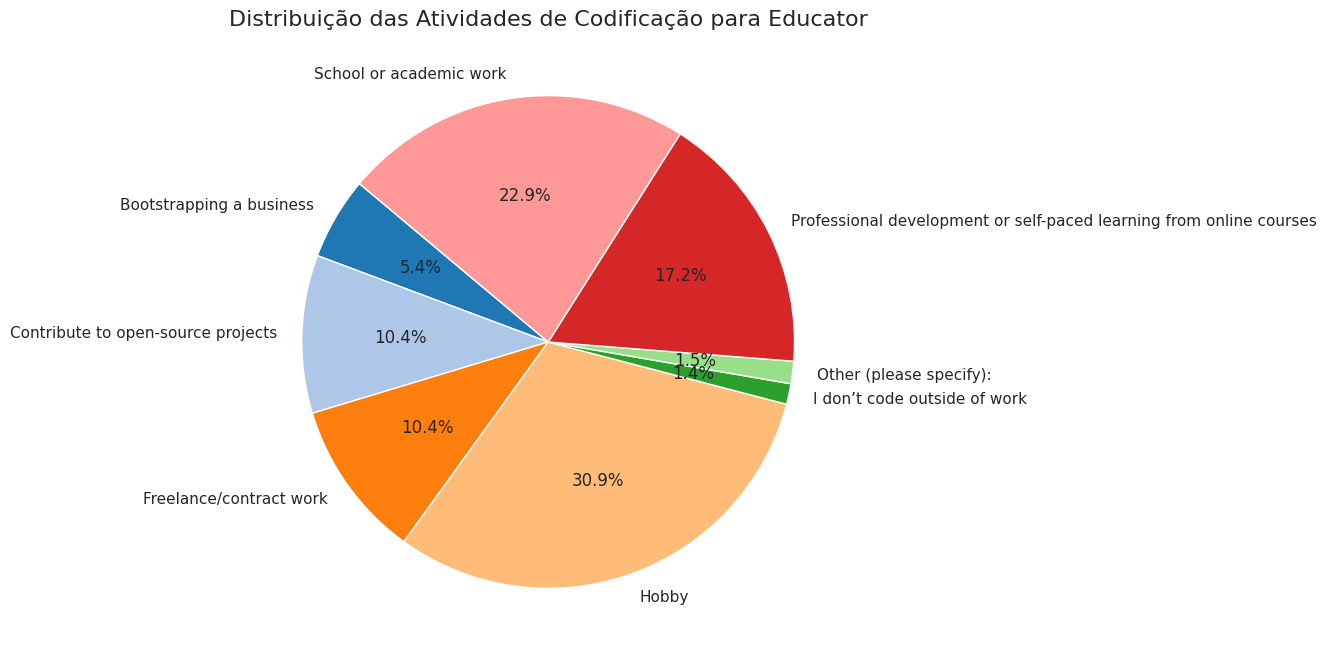

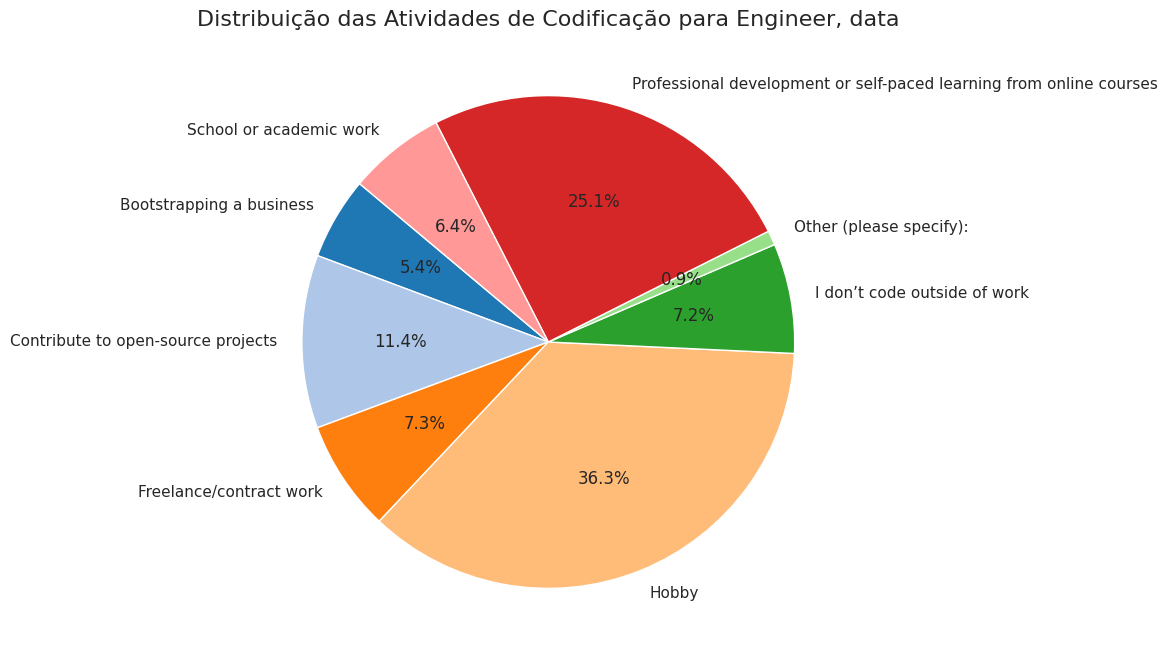

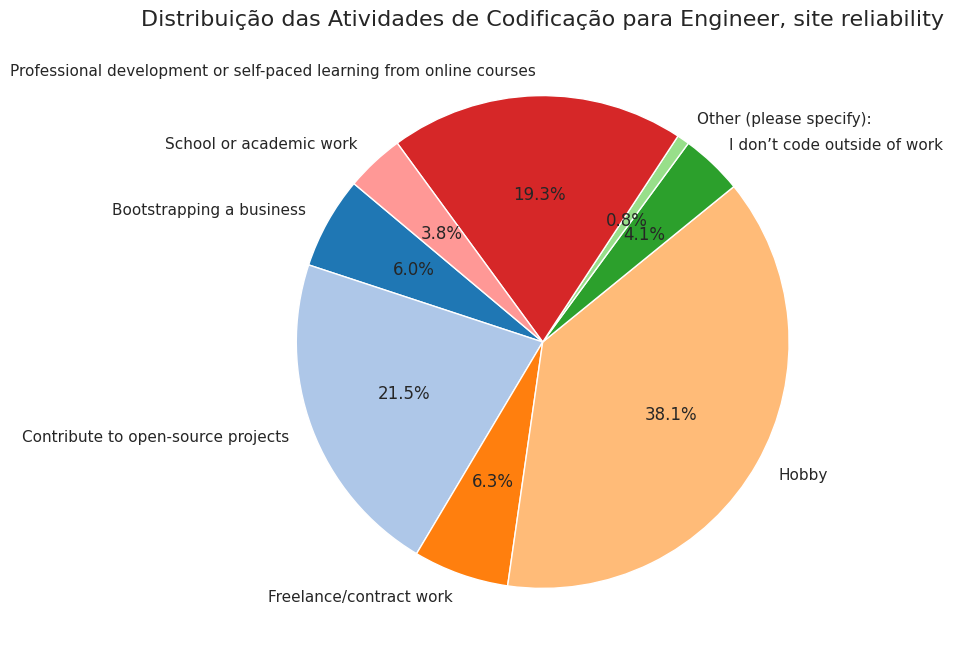

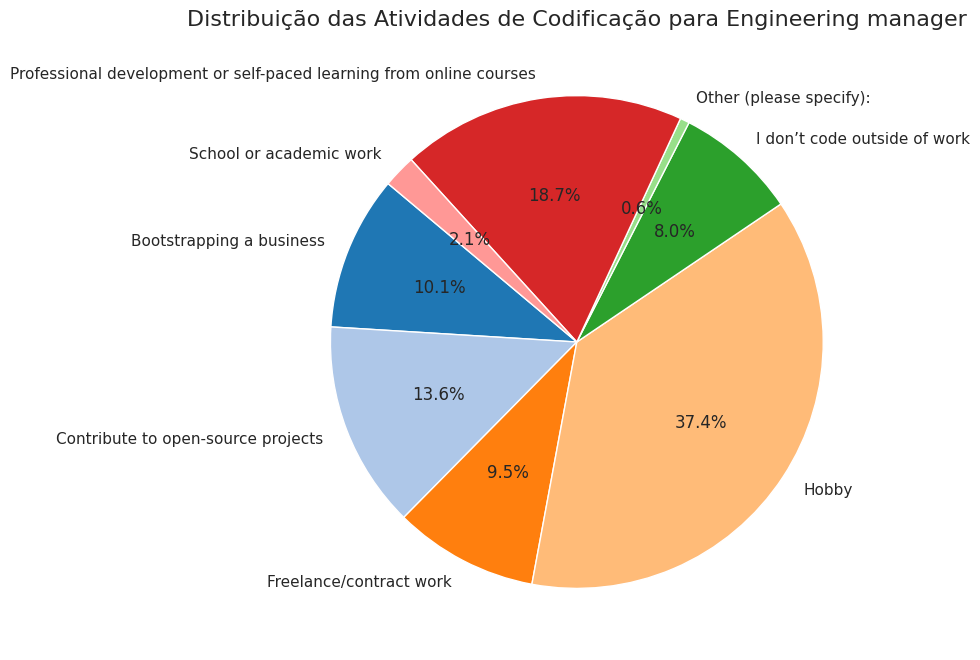

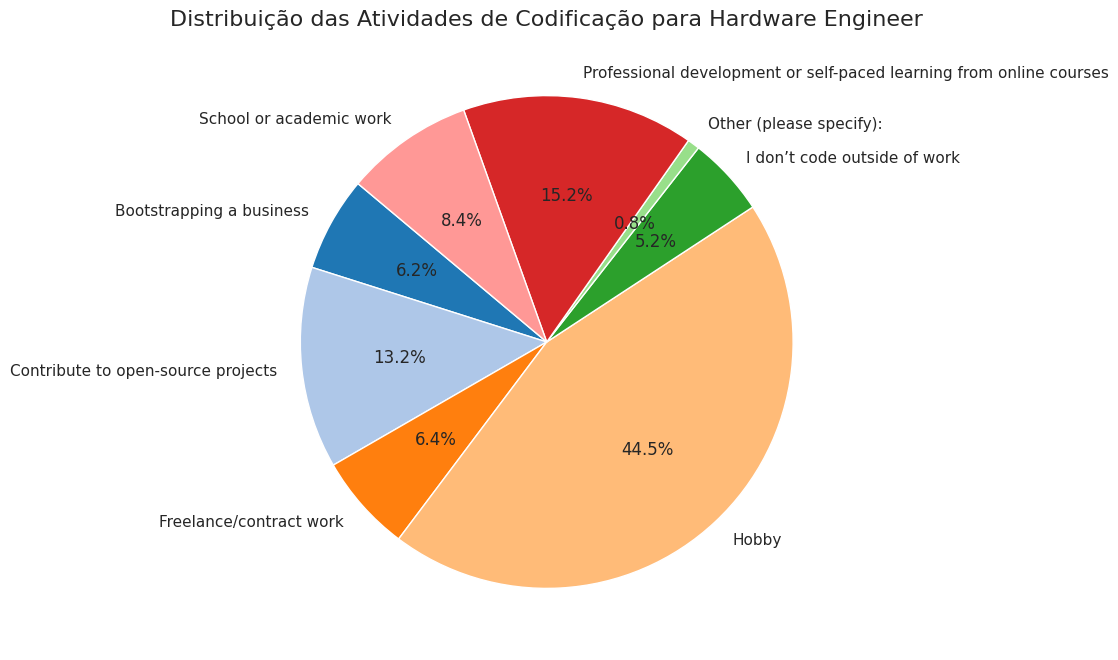

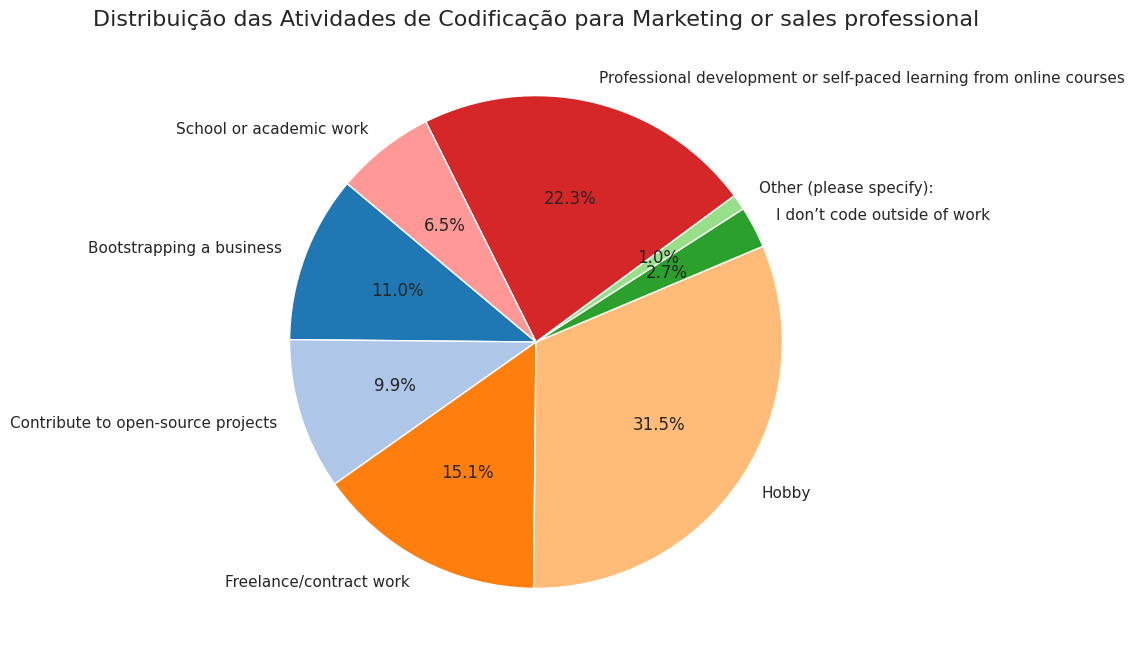

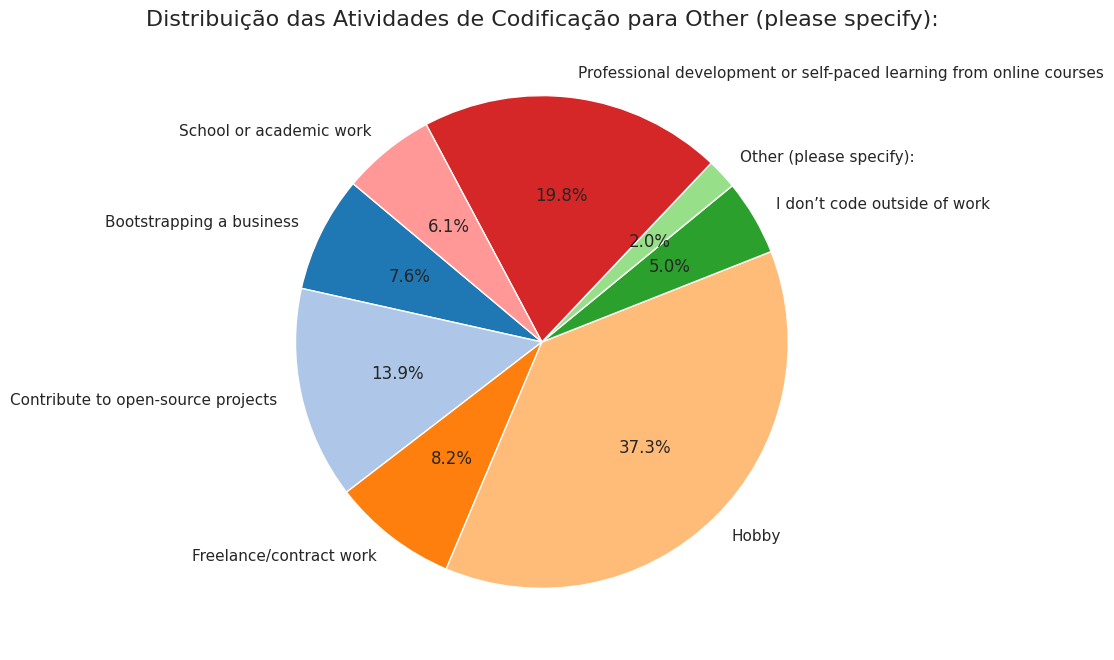

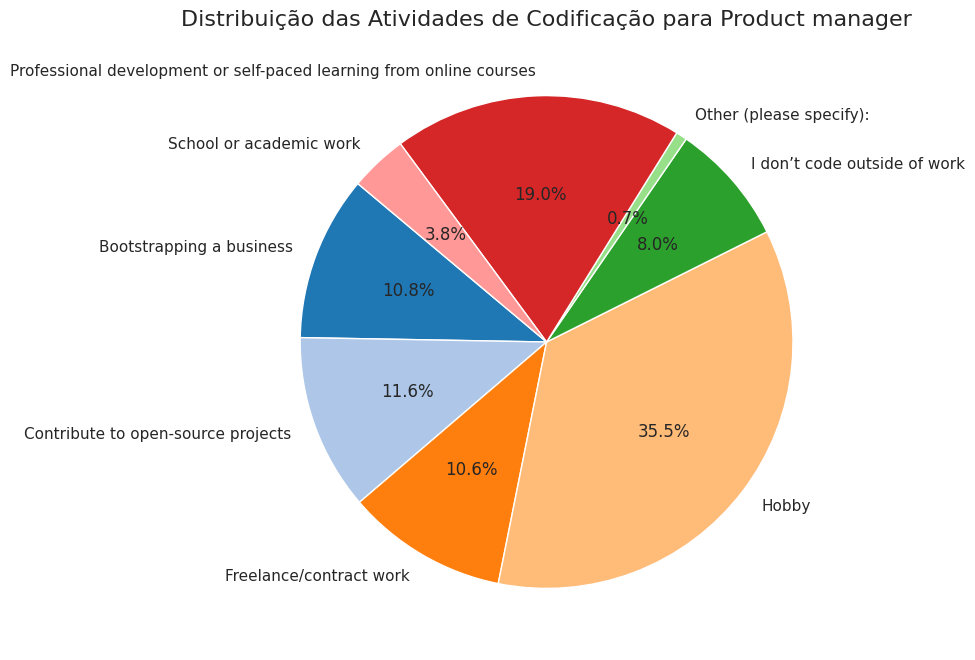

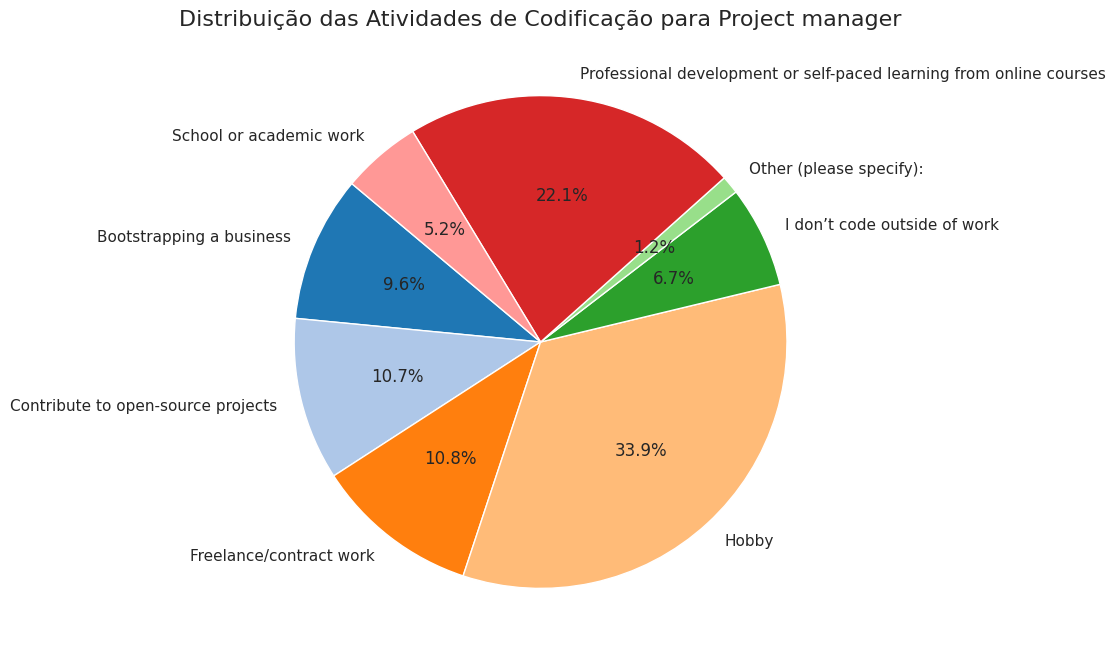

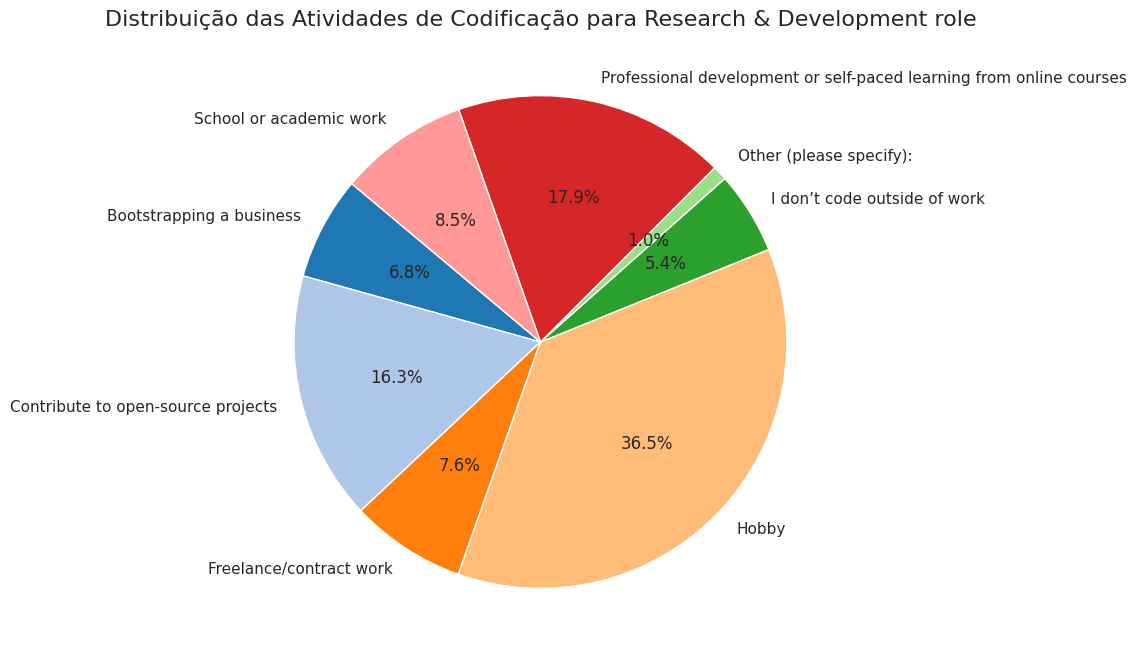

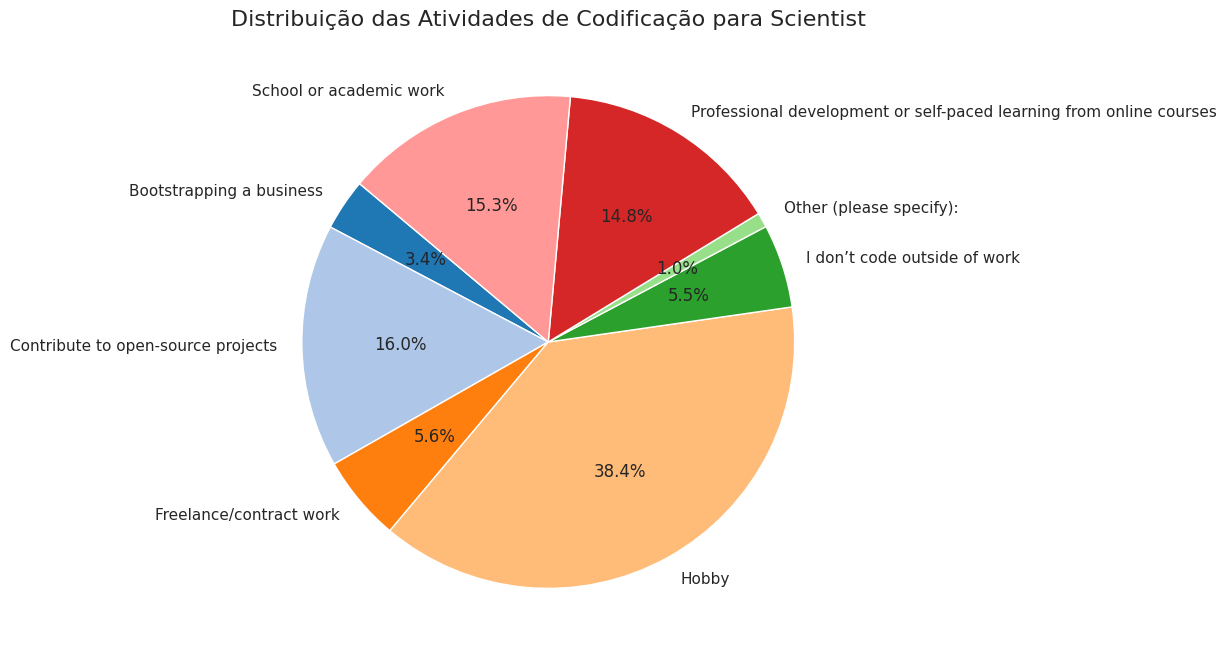

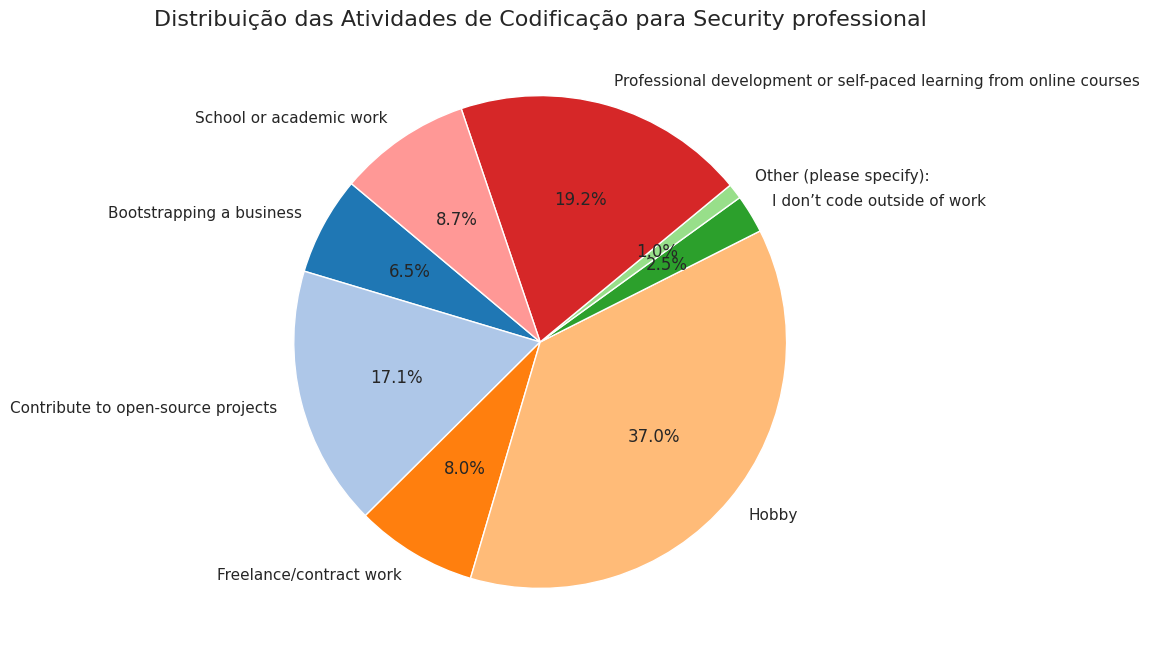

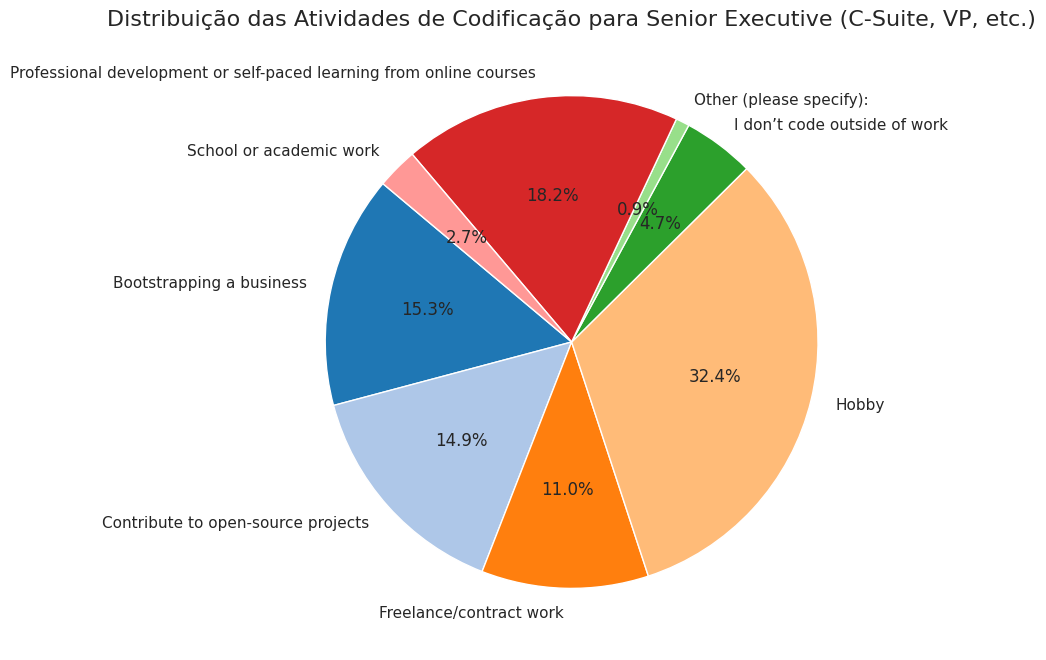

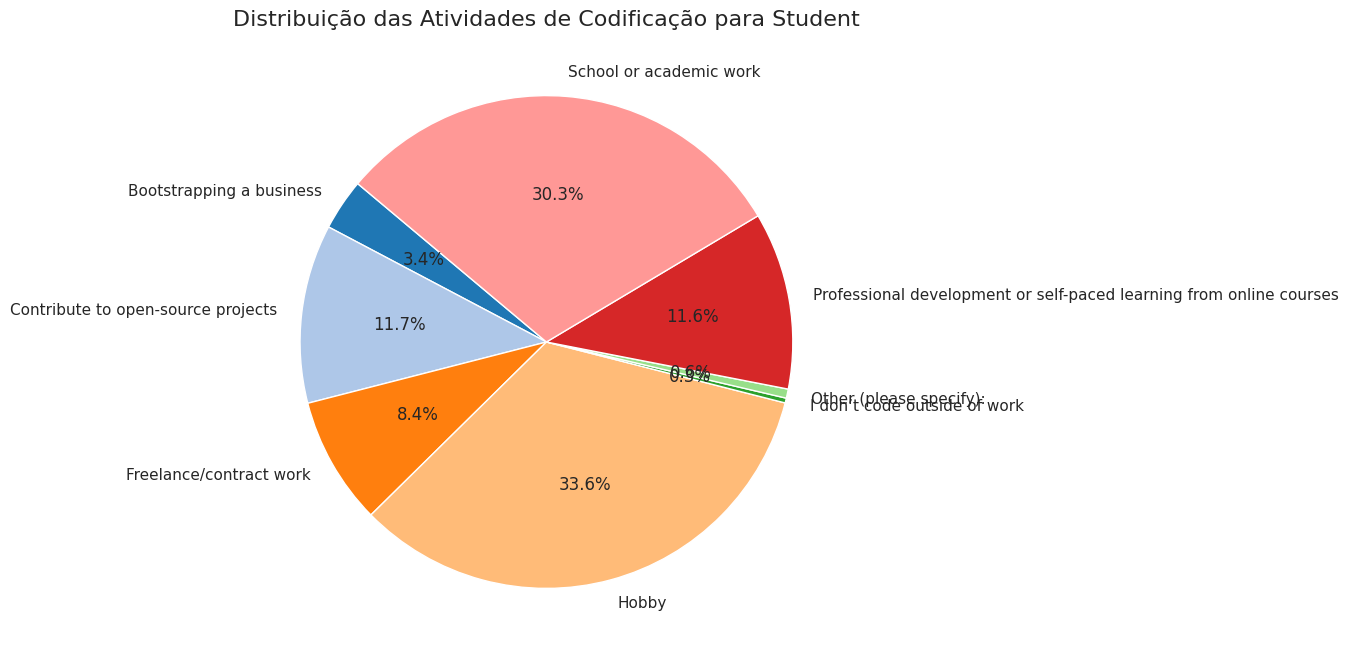

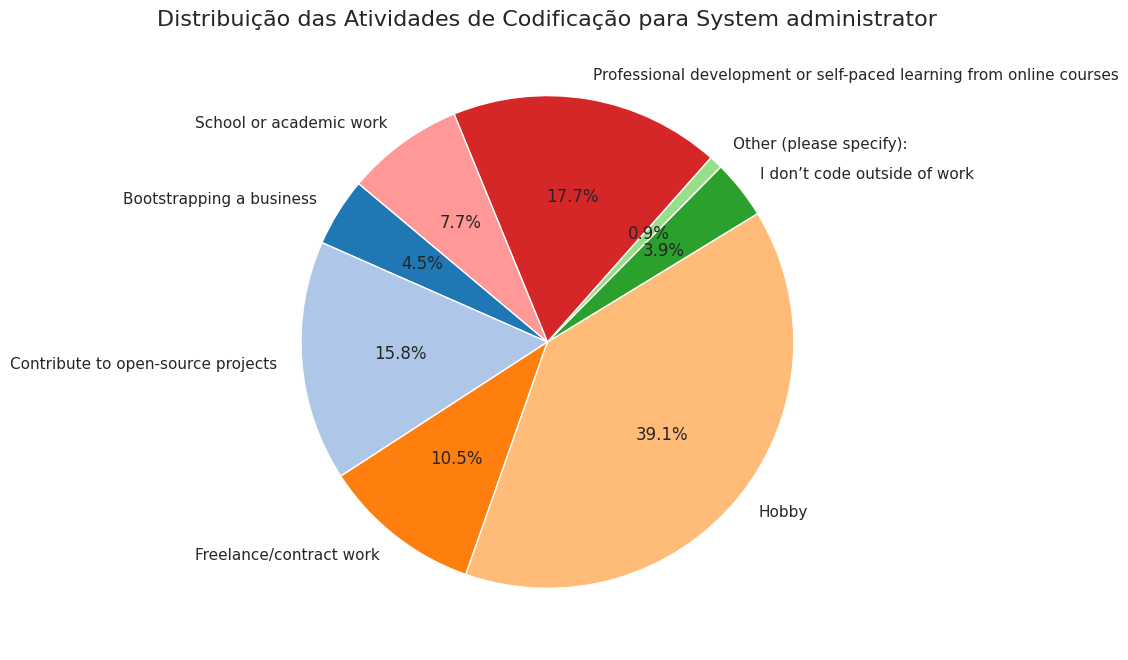

In [ ]:
# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

# Filtrar colunas relevantes
df_filtered = df[['DevType', 'CodingActivities']].dropna()

# Expandir as atividades de codificação em várias linhas
df_expanded = df_filtered.assign(CodingActivities=df_filtered['CodingActivities'].str.split(';')).explode('CodingActivities')

# Contar as ocorrências de cada atividade de codificação por área de atuação
coding_activities_by_devtype = df_expanded.groupby(['DevType', 'CodingActivities']).size().unstack().fillna(0)

# Normalizar os valores para que somem 100% em cada coluna (área de atuação)
coding_activities_by_devtype_pct = coding_activities_by_devtype.div(coding_activities_by_devtype.sum(axis=1), axis=0) * 100

# Plotar o gráfico de barras empilhadas com porcentagens
coding_activities_by_devtype_pct.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='tab20')
plt.title('Atividades de Codificação vs Tipo de Desenvolvedor (em %)', fontsize=18)
plt.xlabel('Área de Atuação', fontsize=14)
plt.ylabel('Porcentagem de Respondentes (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Atividades de Codificação', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.tight_layout()

plt.show()

# Plotar gráficos de pizza para cada tipo de desenvolvedor
for dev_type in coding_activities_by_devtype.index:
    plt.figure(figsize=(8, 8))
    plt.pie(coding_activities_by_devtype.loc[dev_type], labels=coding_activities_by_devtype.columns,
            autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab20', len(coding_activities_by_devtype.columns)))
    plt.title(f'Distribuição das Atividades de Codificação para {dev_type}', fontsize=16)
    plt.show()
